## <div align=center>Assignment-04-Ranjit-Menon </div>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Section 1
### Helper method to visualize the graph and show the degree distribution and historgram 

In [2]:
def visualize_and_analyze_graph(G,alpha):
    
    pos = nx.spring_layout(G)

    # Draw the nodes and labels
    nx.draw_networkx_nodes(G, pos, node_size=800)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

    # Draw the edges with edge transparency 
    edges = G.edges()
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black', alpha=alpha)

    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)

    # Print degree centrality for each node
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality = {centrality:.4f}")

    # Find the family with the most direct ties 
    family_most_direct_ties = max(dict(G.out_degree()).items(), key=lambda x: x[1])[0]
 
    print(f"The family with the most direct ties is: {family_most_direct_ties}")

    # Get the degree histogram
    degree_histogram = nx.degree_histogram(G)

    # Visualize
    plt.figure()
    plt.bar(range(len(degree_histogram)), degree_histogram)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

### Find Degree centrality and Degree Distribution for disconnected nodes A, B , C with alpha rate = 0.15

Node A: Degree Centrality = 0.0000
Node B: Degree Centrality = 0.0000
Node C: Degree Centrality = 0.0000
The family with the most direct ties is: A


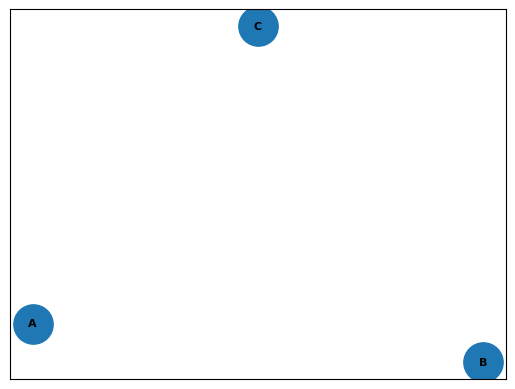

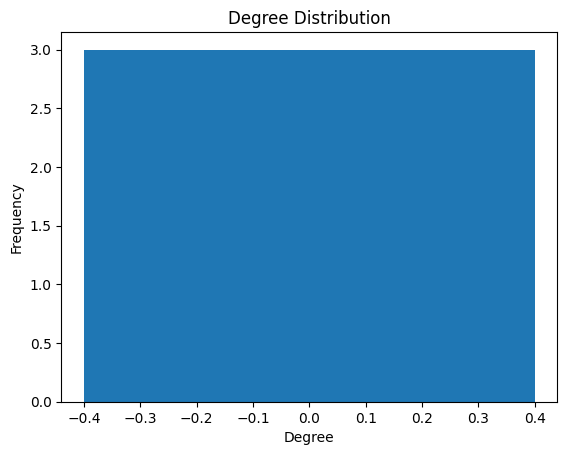

In [3]:
G = nx.DiGraph()

nodes = ['A', 'B', 'C']
G.add_nodes_from(nodes)

visualize_and_analyze_graph(G, 0.15)

### Find Degree centrality and Degree Distribution for Undirected nodes A, B , C with alpha rate = 0.15

Node A: Degree Centrality = 2.0000
Node B: Degree Centrality = 2.0000
Node C: Degree Centrality = 2.0000
The family with the most direct ties is: A


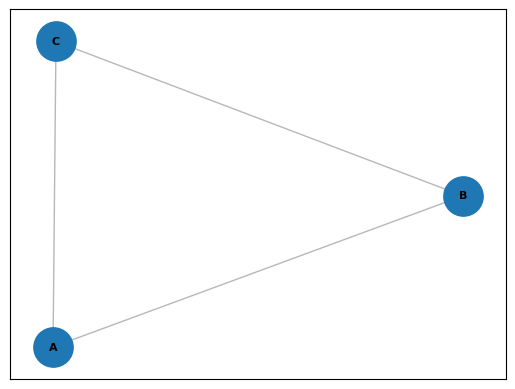

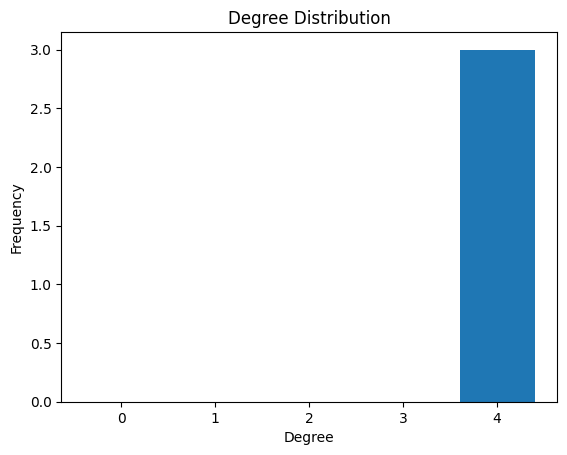

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add directed edges between nodes
edges = [('A', 'B'), ('B', 'A'), ('B', 'C'), ('C', 'B'), ('A', 'C'), ('C', 'A')]
edges = G.add_edges_from(edges)

visualize_and_analyze_graph(G, 0.15)

### Find Degree centrality and Degree Distribution for nodes A, B , C and B connected to both A and C with alpha rate = 0.15

Node A: Degree Centrality = 1.0000
Node B: Degree Centrality = 2.0000
Node C: Degree Centrality = 1.0000
The family with the most direct ties is: B


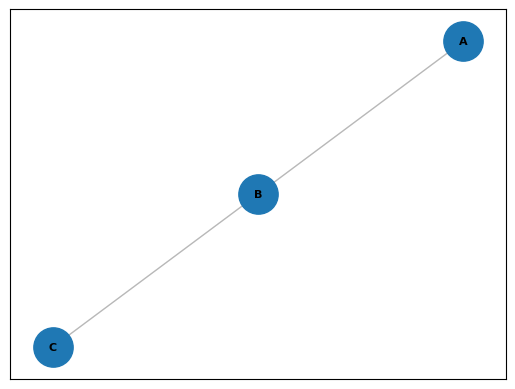

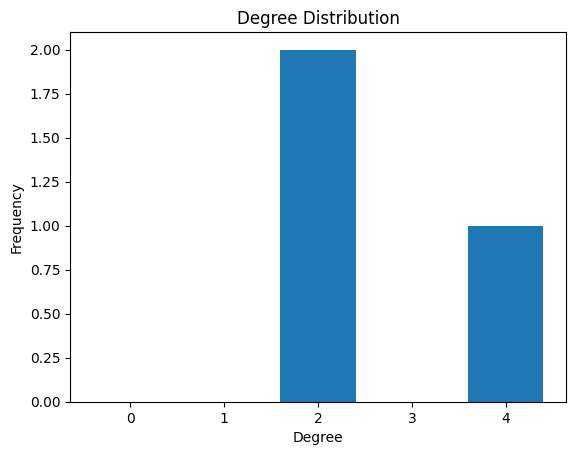

In [5]:
# Create an empty directed graph
G = nx.DiGraph()

# Add edges between nodes
edges = [('A', 'B'), ('B','A'),('B', 'C'),('C','B')]
G.add_edges_from(edges)

visualize_and_analyze_graph(G, 0.15)

## Section 2
### Draw a Network for the below nodes showing connection between Page A, Page B, Page C, Page D

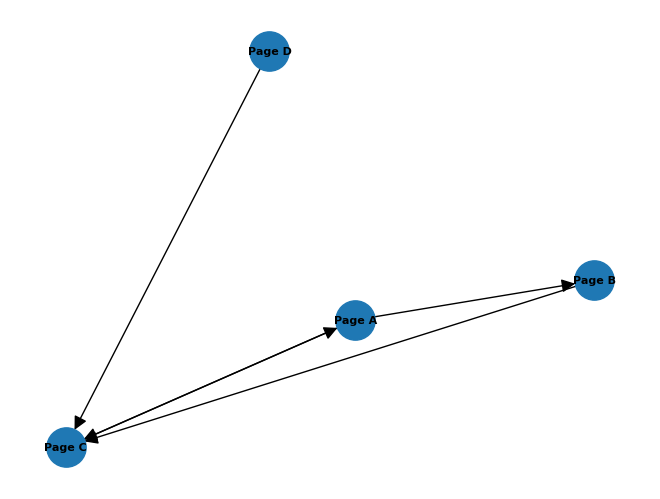

In [6]:
G = nx.DiGraph()

nodes = ['Page A', 'Page B', 'Page C', 'Page D']
G.add_nodes_from(nodes)

# Add edges between nodes
edges = [('Page A', 'Page B'), ('Page A', 'Page C'), ('Page C', 'Page A'), ('Page B', 'Page C'), ('Page D', 'Page C')]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=800, font_size=8, font_color='black', font_weight='bold', arrowsize=20, edge_color='black')

# Show the plot
plt.show()

### Find the transition probability matrix using Google page rank

In [7]:
G = nx.DiGraph()

nodes = ['Page A', 'Page B', 'Page C', 'Page D']
G.add_nodes_from(nodes)

# Add edges between nodes
edges = [('Page A', 'Page B'), ('Page A', 'Page C'), ('Page C', 'Page A'), ('Page B', 'Page C'), ('Page D', 'Page C')]
G.add_edges_from(edges)


# Calculate the transition probability matrix using PageRank with alpha=0.15
transition_matrix = nx.pagerank(G, alpha=0.15)

# Print the transition probability matrix
print("Transition Probability Matrix:")
for node, prob in transition_matrix.items():
    print(f"{node}: {round(prob, 2)}")

Transition Probability Matrix:
Page A: 0.26
Page B: 0.23
Page C: 0.3
Page D: 0.21


### Find the transition probability matrix using Simplified page rank

In [8]:
def simplified_pagerank(graph, alpha=0.15, max_iter=100):
    # Get the number of nodes
    n = len(graph)

    # Create the uniform transition probability matrix
    P = np.ones((n, n)) / n

    # Perform Simplified PageRank iterations
    for _ in range(max_iter):
        prev_pagerank = P.copy()

        # Update the transition probability matrix
        P = (1 - alpha) / n + alpha * np.dot(P, prev_pagerank)

        # Check for convergence
        if np.linalg.norm(P - prev_pagerank) < 1e-6:
            break

    # Convert the final probability matrix to a dictionary
    pagerank_dict = {node: P[0, i] for i, node in enumerate(graph.nodes())}

    return pagerank_dict

G = nx.DiGraph()
G.add_edges_from([('Page A', 'Page B'), ('Page A', 'Page C'), ('Page C', 'Page A'), ('Page B', 'Page C'), ('Page D', 'Page C')])

# Calculate Simplified PageRank
pagerank_result = simplified_pagerank(G)

print("Transition Probability Matrix (simplified Page matrix):")
for node, prob in pagerank_result.items():
    print(f"{node}: {round(prob, 2)}")

Transition Probability Matrix (simplified Page matrix):
Page A: 0.25
Page B: 0.25
Page C: 0.25
Page D: 0.25


### Compute the rank of each of the pages using the matrix equation R = T*R

In [9]:
G = nx.DiGraph()
G.add_edges_from([('Page A', 'Page B'), ('Page A', 'Page C'), ('Page C', 'Page A'), ('Page B', 'Page C'), ('Page D', 'Page C')])

# Create the transition probability matrix T (with fix for data type)
T = nx.adjacency_matrix(G).todense()
T = T.astype(np.float64)  

n = len(T)
for i in range(n):
    T[i] /= T[i].sum()  # Normalize each row to represent probabilities

# Initialize the rank vector R
R = np.ones(n) / n  

# Iteratively update R until convergence
for _ in range(100):
    R = np.dot(T, R)

print(R)

[0.25 0.25 0.25 0.25]


### Check if Google page rank and Simplified page rank gives equal score for any of the pages (Page A, B, C, D)

#### Google Page rank Score


Page A: 0.26

Page B: 0.23

Page C: 0.3

Page D: 0.21

#### Simplified Page matrix :

Page A: 0.25

Page B: 0.25

Page C: 0.25

Page D: 0.25